In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('/content/taxifare_updata.csv')
df.head()

,fare_amount,fare_class,passenger_count,year,month,day,hours,minutes,second,daynight,total_dist
0,6.5,0,1,2010,4,19,4,17,56,0,2.126312
1,6.9,0,1,2010,4,17,11,43,53,0,1.392307
2,10.1,1,2,2010,4,17,7,23,26,0,3.326763
3,8.9,0,1,2010,4,11,17,25,3,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,1,7.231321


In [46]:
df['total_dist'] = df['total_dist'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      120000 non-null  float64
 1   fare_class       120000 non-null  int64  
 2   passenger_count  120000 non-null  int64  
 3   year             120000 non-null  int64  
 4   month            120000 non-null  int64  
 5   day              120000 non-null  int64  
 6   hours            120000 non-null  int64  
 7   minutes          120000 non-null  int64  
 8   second           120000 non-null  int64  
 9   daynight         120000 non-null  int64  
 10  total_dist       120000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 10.1 MB


In [47]:
# Split data into dependent feature and Independent feature
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [48]:
# split the data into training and Validation set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

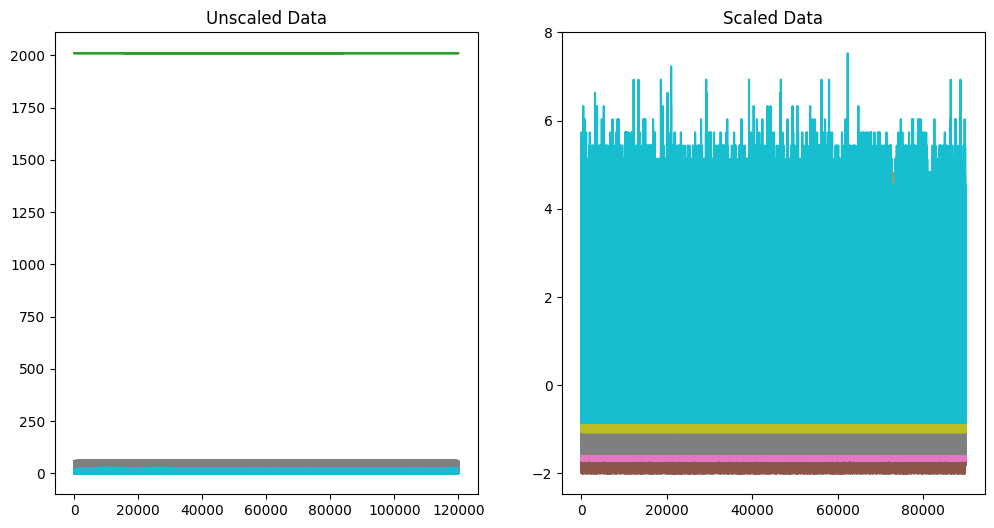

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x_train)
plt.title("Unscaled Data")

plt.subplot(1,2,2)
plt.plot(x_train_scaled)
plt.title("Scaled Data")
plt.show()

# Train the model usin Artificial Neural Network (Regression Problem)

In [51]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU

In [52]:
model = Sequential()
# Input layer
model.add(Dense(128,kernel_initializer='uniform',input_dim=x_train_scaled.shape[1],activation='relu'))

# Hidden Layers
model.add(Dense(256,kernel_initializer='uniform',activation='relu'))
model.add(Dense(256,kernel_initializer='uniform',activation='relu'))
model.add(Dense(256,kernel_initializer='uniform',activation='relu'))
# Output Layer
model.add(Dense(1,kernel_initializer='he_uniform',activation='linear'))

# Compile the network
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error','accuracy'])

# model.fit(x_train_scaled,y_train,batch_size=10,validation_split==0.33,epochs=10)
model.fit(x_train_scaled, y_train, batch_size=10, validation_split=0.33, epochs=2)


Epoch 1/2
6030/6030 [==============================] - 31s 5ms/step - loss: 1.6972 - mean_absolute_error: 1.6972 - accuracy: 0.0000e+00 - val_loss: 1.5891 - val_mean_absolute_error: 1.5891 - val_accuracy: 0.0000e+00
Epoch 2/2
6030/6030 [==============================] - 28s 5ms/step - loss: 1.5564 - mean_absolute_error: 1.5564 - accuracy: 0.0000e+00 - val_loss: 1.7060 - val_mean_absolute_error: 1.7060 - val_accuracy: 0.0000e+00


In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1408      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166273 (649.50 KB)
Trainable params: 166273 (649.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.get_compile_config()

{'optimizer': 'adam',
 'loss': 'mean_absolute_error',
 'metrics': ['mean_absolute_error', 'accuracy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

In [55]:
model.get_build_config()

{'input_shape': (None, 10)}

In [56]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.7060149>,
 'mean_absolute_error': <tf.Tensor: shape=(), dtype=float32, numpy=1.7060149>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>}

In [57]:
model.get_weights()

[array([[ 1.2507281e-02,  3.7428522e-03,  3.8072109e-04, ...,
          8.1347451e-02, -1.3689455e-01, -9.3266005e-03],
        [-5.2363495e-03, -8.2928455e-03, -5.3848135e-03, ...,
         -1.7628130e-03, -8.3573740e-03,  1.7166980e-02],
        [-3.4901571e-02, -8.7587610e-03,  3.3200506e-02, ...,
          4.5535926e-02, -3.3162117e-02, -3.5375308e-02],
        ...,
        [ 1.0532158e-02,  1.5280357e-03,  1.5314233e-02, ...,
          1.3441788e-02, -7.7963523e-03,  3.6010928e-02],
        [ 2.6005045e-02,  8.8421581e-03, -1.4003375e-02, ...,
          1.8601600e-02,  2.3038024e-03, -1.1076353e-02],
        [-3.9765020e-03, -4.1589197e-03, -2.0921197e-02, ...,
          4.7808424e-02, -3.8264921e-01, -5.0764508e-03]], dtype=float32),
 array([-0.07107593, -0.0522512 , -0.16288511, -0.19074832, -0.00037587,
        -0.14716576, -0.20715821, -0.06908991,  0.11230519, -0.10203999,
         0.02676216, -0.24170472, -0.09796111, -0.17011046, -0.12989224,
        -0.06415202, -0.1639135

In [58]:
prediction = model.predict(x_test_scaled,batch_size=5,verbose=2)

6000/6000 - 9s - 9s/epoch - 1ms/step


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
print("MSE: ",mean_squared_error(y_test,prediction))
print('MAE:',mean_absolute_error(y_test,prediction))
print("RMSE:", np.sqrt(mean_squared_error(y_test,prediction)))

MSE:  9.948274889924935
MAE: 1.6858511191190084
RMSE: 3.1540885989339196
